In [1]:
import pandas as pd
import numpy as np
import json
import collections
from collections import Counter, OrderedDict
from natsort import index_natsorted, natsorted, ns
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

In [2]:
cellData = pd.read_csv('cellData.tsv', sep='\t')
geneData = pd.read_csv('geneData.tsv', sep='\t')
gene_panel = np.unique(geneData.Gene.values)

In [3]:
mylist = []
for index, row in cellData.iterrows():
    arr = json.loads(row.Prob)
    idx = np.argmax(arr)
    ClassName = eval(row.ClassName)
    mylist.append(ClassName[idx])
# out
mylist = sorted(mylist)

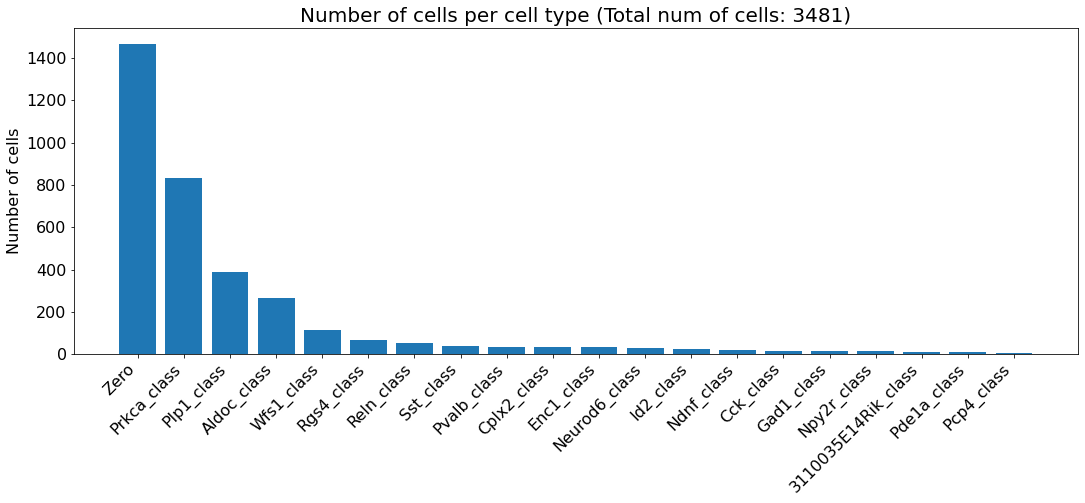

In [4]:
fig, ax = plt.subplots(figsize=(18,6))

co = collections.Counter(mylist)
co = OrderedDict(co.most_common())
plt.bar(range(len(co.keys())), list(co.values()), tick_label=list(co.keys()))

plt.title('Number of cells per cell type (Total num of cells: %d)' % cellData.shape[0],  fontsize=20)
plt.ylabel('Number of cells', fontsize=16)
ax.set_xticklabels(list(co.keys()), rotation = 45, ha="right")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.savefig('cells_per_class.png', bbox_inches = 'tight')

In [14]:
pd.DataFrame([co]).T.to_csv("top_class_size.csv")

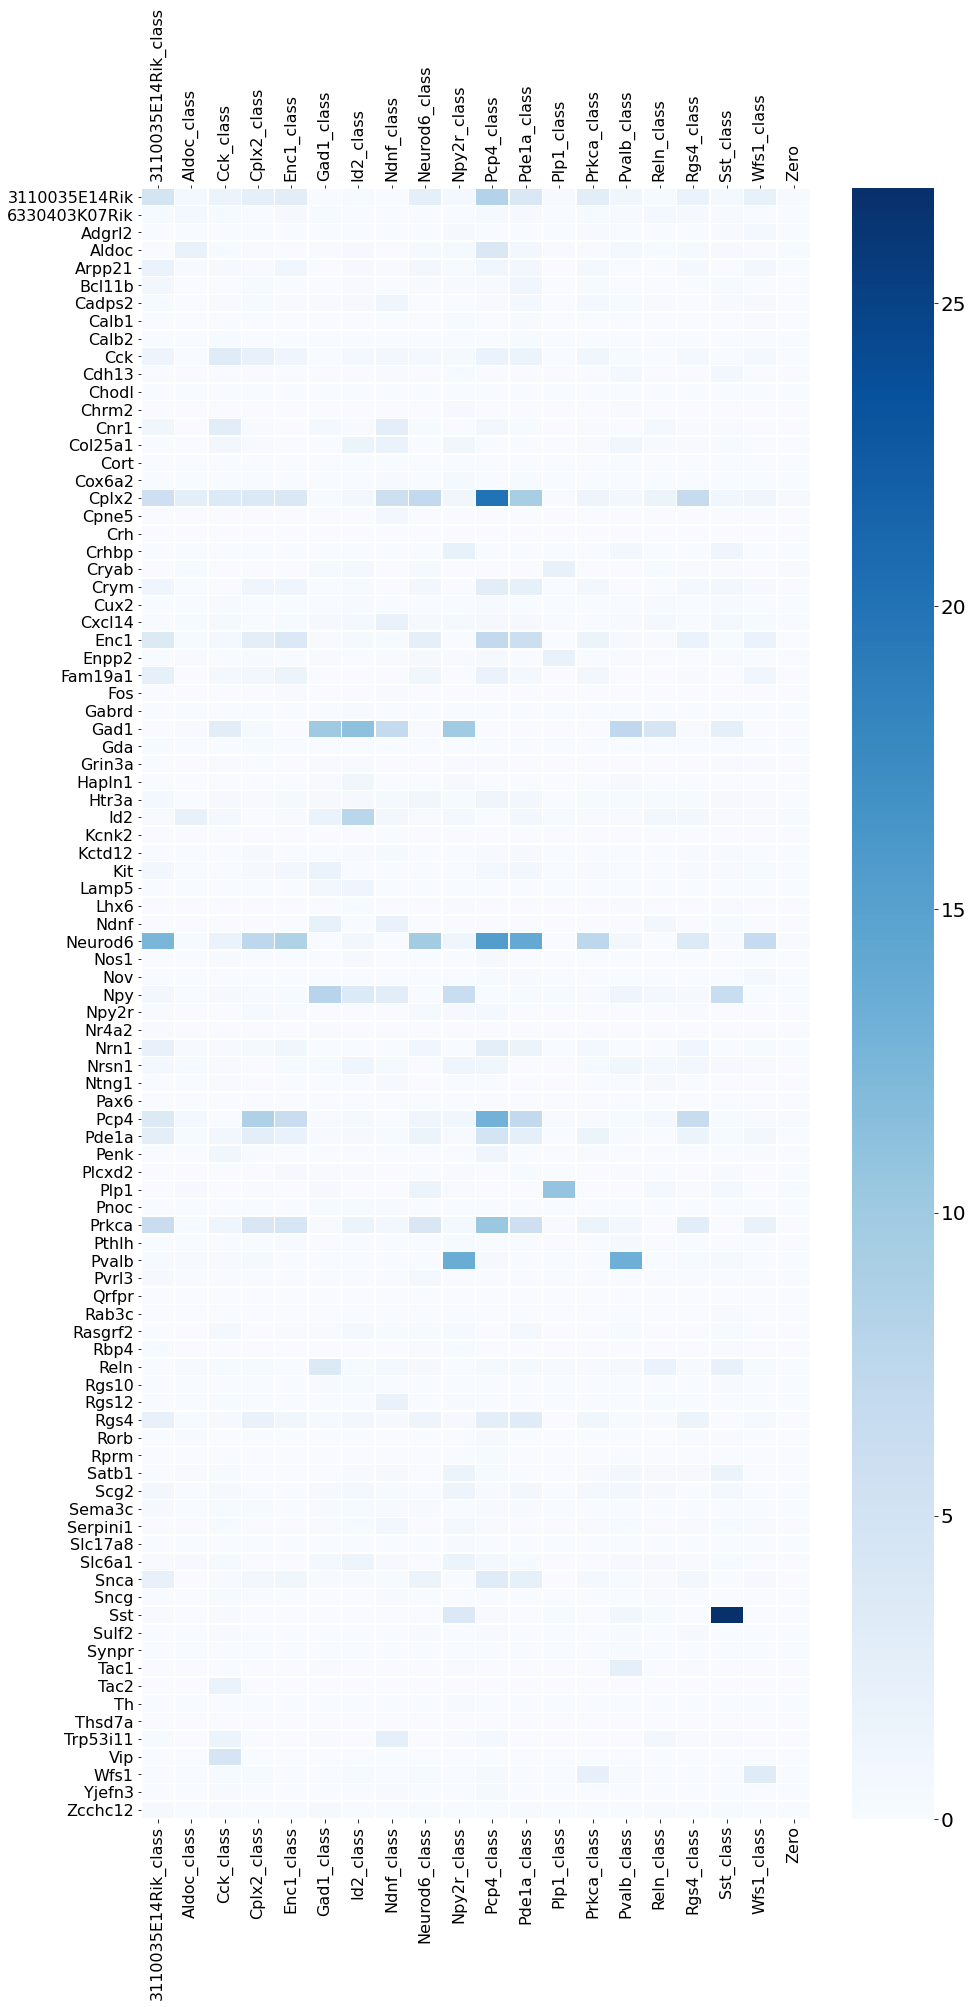

In [5]:
mylist = []
for index, row in cellData.iterrows():
    arr = json.loads(row.Prob)
    idx = np.argmax(arr)
    ClassName = eval(row.ClassName)
    mylist.append(ClassName[idx])
# out
# mylist = sorted(mylist)
df = pd.DataFrame(columns=gene_panel, index=mylist)
for i in range(df.shape[0]):
    cols = eval(cellData.iloc[i].Genenames)
    vals = eval(cellData.iloc[i].CellGeneCount)
    df.iloc[i][cols] = vals

df = df.fillna(0)
df = df.groupby(axis=0, level=0).mean()
df = df.T
df = df.sort_index(axis=1,
                   key=lambda x: np.argsort(index_natsorted(df.columns.values))
                   )
plt.figure(figsize = (15,30))
# ax = sns.heatmap(df, annot=True, cmap="YlGnBu")
ax = sns.heatmap(df, annot=False, cmap="Blues", linewidths=.5)
# plt.savefig('heatmap.png')
# ax.set_xticklabels(rotation = 90, ha="center")
ax.tick_params(top=True, labeltop=True)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(rotation='vertical')
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.savefig('heatmap.png')
df.to_csv('counts_per_cell.csv')

In [6]:
cellData.shape

(3481, 13)

In [7]:
df.to_csv('counts_per_class.csv')

In [8]:
np.random.seed(2021)
nC = 3482
K = 92
rd = np.random.dirichlet([nC / K] * K)
# class_prior = np.append(0.5 * rd, 0.5)
class_prior = rd
class_labels = ['label_'+str(i) for i in range(K)]
# class_labels.append('Zero')

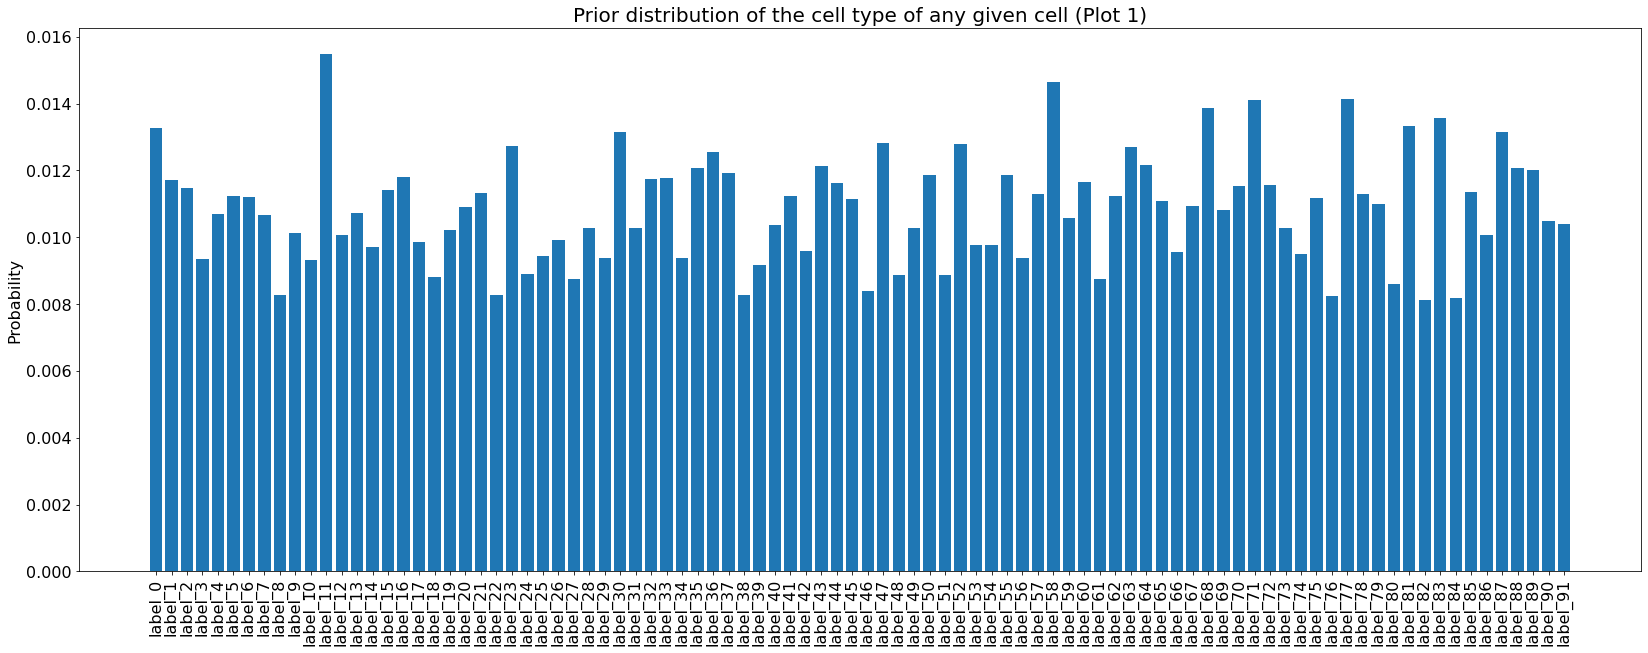

In [9]:
fig, ax = plt.subplots(figsize=(28,10))

plt.bar(range(len(class_labels)), list(class_prior), tick_label=class_labels)

plt.title('Prior distribution of the cell type of any given cell (Plot 1)',  fontsize=20)
plt.ylabel('Probability', fontsize=16)
ax.set_xticklabels(class_labels, rotation = 'vertical', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=2)
plt.savefig('cell_type_prior_1.png', bbox_inches = 'tight')

In [10]:
df = pd.read_csv('cell_type_probs.csv')

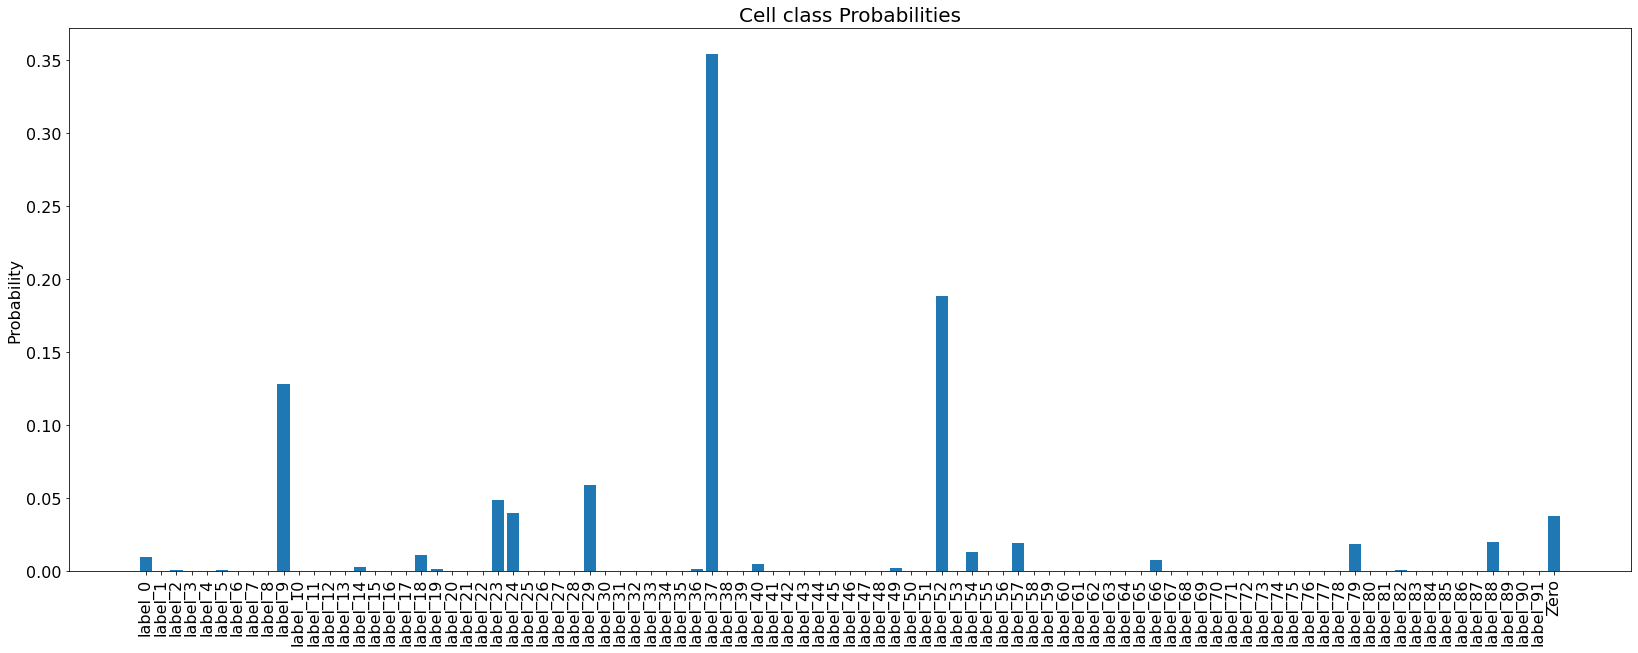

In [11]:
fig, ax = plt.subplots(figsize=(28,10))

plt.bar(range(len(df.Name)), df.Prob.values, tick_label=df.Prob.values)

plt.title('Cell class Probabilities',  fontsize=20)
plt.ylabel('Probability', fontsize=16)
ax.set_xticklabels(df.Name.values, rotation = 'vertical', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=2)
plt.savefig('cell_type_probs.png', bbox_inches = 'tight')

In [12]:
geneData.iloc[123].neighbour_prob

'[0.8853193176265445, 0.07406255505591512, 1.6501501562982932e-05, 0.04060162581597752]'

In [13]:
co

OrderedDict([('Zero', 1286),
             ('label_67', 857),
             ('label_21', 434),
             ('label_61', 225),
             ('label_84', 33),
             ('label_52', 24),
             ('label_50', 21),
             ('label_3', 15),
             ('label_37', 15),
             ('label_56', 15),
             ('label_68', 14),
             ('label_69', 14),
             ('label_23', 13),
             ('label_29', 13),
             ('label_38', 13),
             ('label_41', 13),
             ('label_59', 12),
             ('label_71', 12),
             ('label_80', 12),
             ('label_31', 11),
             ('label_64', 11),
             ('label_85', 11),
             ('label_30', 10),
             ('label_39', 10),
             ('label_46', 10),
             ('label_60', 10),
             ('label_70', 10),
             ('label_72', 10),
             ('label_0', 9),
             ('label_15', 9),
             ('label_42', 9),
             ('label_77', 9),
             

In [22]:
df.head()

,Zero,label_0,label_1,label_3,label_5,label_6,label_7,label_8,label_9,label_10,...,label_81,label_82,label_83,label_84,label_85,label_86,label_87,label_88,label_89,label_90
3110035E14Rik,0.193237,6.883473,2.492310,1.521481,0.017085,0.356203,1.201190,2.897342,2.901187,0.713575,...,2.503342,1.475930,0.051801,2.185097,1.090422,0.240799,0.364264,3.049334,1.125814,3.206434
6330403K07Rik,0.103319,0.000485,2.671618,0.070949,0.000000,0.217465,0.731971,0.479490,0.000000,0.041786,...,0.194933,0.000000,0.000000,0.347684,0.508488,0.366357,0.313861,0.003779,0.321522,0.005632
Adgrl2,0.006230,0.003293,0.000000,0.258229,0.000000,0.000000,0.225157,0.245444,0.000000,0.121627,...,0.018179,0.002321,0.000000,0.005076,0.143157,0.122760,0.104651,0.242045,0.000000,0.191288
Aldoc,0.288705,0.200914,0.136207,2.684409,0.001868,0.000000,0.194609,1.063089,0.051648,0.352952,...,0.031219,0.244734,0.021976,0.074227,0.000407,0.034331,0.785069,0.351940,0.000000,0.000000
Arpp21,0.035829,0.105289,0.168187,0.288431,0.928447,0.645839,0.176636,0.412928,0.279128,0.329275,...,0.226183,0.254274,0.000388,0.119472,0.188206,0.122515,0.259128,0.317326,0.327446,1.983994


In [21]:
df.to_csv('counts_per_cell.csv')

In [ ]:
df.label_80.values

In [ ]:
df.label_81.Sst

array([5.70920558e-01, 4.46831759e-01, 3.22404818e-01, 4.96358038e-01,
       4.37100180e-02, 1.24774041e-01, 1.60030906e-01, 7.71645366e-02,
       0.00000000e+00, 6.82968044e-02, 2.96923499e-01, 0.00000000e+00,
       1.63437463e-01, 2.54806619e-01, 3.21554299e-01, 0.00000000e+00,
       8.23043146e-02, 3.26160192e-01, 0.00000000e+00, 0.00000000e+00,
       6.98175344e-01, 0.00000000e+00, 9.98699917e-01, 7.67773626e-04,
       1.48704826e+00, 3.87028405e-01, 0.00000000e+00, 6.65659921e-02,
       1.35311014e-02, 0.00000000e+00, 3.22780806e+00, 2.31985380e-01,
       1.47000661e-01, 7.79724732e-02, 3.25109527e-01, 2.14375734e-01,
       0.00000000e+00, 1.06266040e-01, 0.00000000e+00, 0.00000000e+00,
       4.75002315e-01, 3.20499228e-01, 8.95097782e-02, 8.18635932e-02,
       2.20457696e-04, 5.87243490e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.55823284e-01, 0.00000000e+00, 0.00000000e+00,
       1.68223715e-01, 5.60191860e-02, 0.00000000e+00, 0.00000000e+00,
      

In [27]:
df.label_81.Sst

0.0